In [ ]:
#OTT_Consumer_Segmenation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns

In [2]:
# Load dataset (replace with actual dataset)
df = pd.read_csv('OTT_Consumer_Segmentation.csv')

In [3]:
# Display basic info
print("Dataset Info:\n", df.info())
print("\nSummary Statistics:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   User_ID                   1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Region                    1000 non-null   object
 4   Watch_Time_per_Week       1000 non-null   int64 
 5   Preferred_Genre           1000 non-null   object
 6   Subscription_Type         1000 non-null   object
 7   Binge_Watching_Frequency  1000 non-null   object
 8   Platform_Usage            1000 non-null   object
 9   Monthly_Spending          1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.3+ KB
Dataset Info:
 None

Summary Statistics:
            User_ID          Age  Watch_Time_per_Week  Monthly_Spending
count  1000.000000  1000.000000          1000.000000        1000.00000
mean    500

In [4]:
# Handle missing values
df.dropna(inplace=True)

In [5]:
# Selecting numeric features for clustering
numerical_cols = df.select_dtypes(include=['number']).columns
data = df[numerical_cols]

In [6]:
# Standardizing data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [7]:
# Splitting data into train and test sets
X = data_scaled
y = df.iloc[:, -1]  # Assuming last column is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"\n{model.__class__.__name__} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))
    return accuracy, precision, recall, f1

In [10]:
# Train and evaluate Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluate_model(rf_model, X_test, y_test)


RandomForestClassifier Performance:
Accuracy: 0.9400
Precision: 0.9496
Recall: 0.9400
F1 Score: 0.9406

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         7
           2       0.89      0.80      0.84        10
           3       0.67      0.75      0.71         8
           4       0.80      0.80      0.80         5
           5       0.75      1.00      0.86         3
           6       0.88      0.88      0.88         8
           7       1.00      0.75      0.86         4
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         7
          12       1.00      0.86      0.92         7
          13       0.86      1.00      0.92         6
          14       1.00      1.00      1.00        11
      

In [11]:
# Train and evaluate SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_accuracy, svm_precision, svm_recall, svm_f1 = evaluate_model(svm_model, X_test, y_test)



SVC Performance:
Accuracy: 0.4050
Precision: 0.5136
Recall: 0.4050
F1 Score: 0.3745

Classification Report:
               precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.00      0.00         7
           2       0.00      0.00      0.00        10
           3       0.19      0.38      0.25         8
           4       0.40      0.40      0.40         5
           5       0.29      0.67      0.40         3
           6       0.60      0.38      0.46         8
           7       1.00      0.00      0.00         4
           8       0.50      0.33      0.40         9
           9       0.18      0.67      0.29         3
          10       0.75      0.33      0.46         9
          11       0.50      0.57      0.53         7
          12       0.38      0.43      0.40         7
          13       0.27      0.50      0.35         6
          14       0.75      0.55      0.63        11
          15       0.38  

In [12]:
# Train and evaluate KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_accuracy, knn_precision, knn_recall, knn_f1 = evaluate_model(knn_model, X_test, y_test)


KNeighborsClassifier Performance:
Accuracy: 0.1200
Precision: 0.1621
Recall: 0.1200
F1 Score: 0.1139

Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.60      0.32         5
           1       0.20      0.14      0.17         7
           2       0.00      0.00      0.00        10
           3       0.25      0.12      0.17         8
           4       0.00      0.00      0.00         5
           5       0.10      0.33      0.15         3
           6       0.12      0.12      0.12         8
           7       0.00      0.00      0.00         4
           8       0.08      0.11      0.10         9
           9       0.00      0.00      0.00         3
          10       0.17      0.11      0.13         9
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00         6
          14       0.12      0.18      0.15        11
        


Model Performance Summary:
            Model  Accuracy  Precision  Recall  F1 Score
0  Random Forest     0.940   0.949575   0.940  0.940591
1            SVM     0.405   0.513570   0.405  0.374521
2            KNN     0.120   0.162126   0.120  0.113949


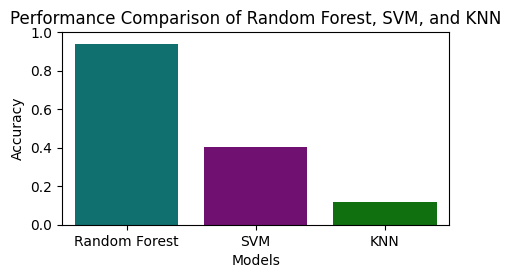

In [13]:
# Performance Comparison
models = ['Random Forest', 'SVM', 'KNN']
accuracies = [rf_accuracy, svm_accuracy, knn_accuracy]
precisions = [rf_precision, svm_precision, knn_precision]
recalls = [rf_recall, svm_recall, knn_recall]
f1_scores = [rf_f1, svm_f1, knn_f1]

metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})
print("\nModel Performance Summary:\n", metrics_df)

plt.figure(figsize=(5, 2.5))
sns.barplot(x=models, y=accuracies, hue=models, dodge=False, palette=['teal', 'purple', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Performance Comparison of Random Forest, SVM, and KNN')
plt.ylim(0, 1)
plt.legend([], [], frameon=False)
plt.show()

In [15]:
# Displaying final dataset with cluster labels
print(df.head())

   User_ID  Age  Gender         Region  Watch_Time_per_Week Preferred_Genre  \
0        1   56  Female  North America                   17          Sci-Fi   
1        2   46    Male  North America                   30          Sci-Fi   
2        3   32  Female         Europe                   13          Action   
3        4   25    Male  South America                   21          Comedy   
4        5   38  Female         Africa                   19          Horror   

  Subscription_Type Binge_Watching_Frequency Platform_Usage  Monthly_Spending  
0             Basic                Sometimes        Disney+                 2  
1              Free                Sometimes        HBO Max                11  
2              Free                Sometimes   Amazon Prime                21  
3             Basic                   Rarely        Netflix                16  
4           Premium                Sometimes           Hulu                 3  


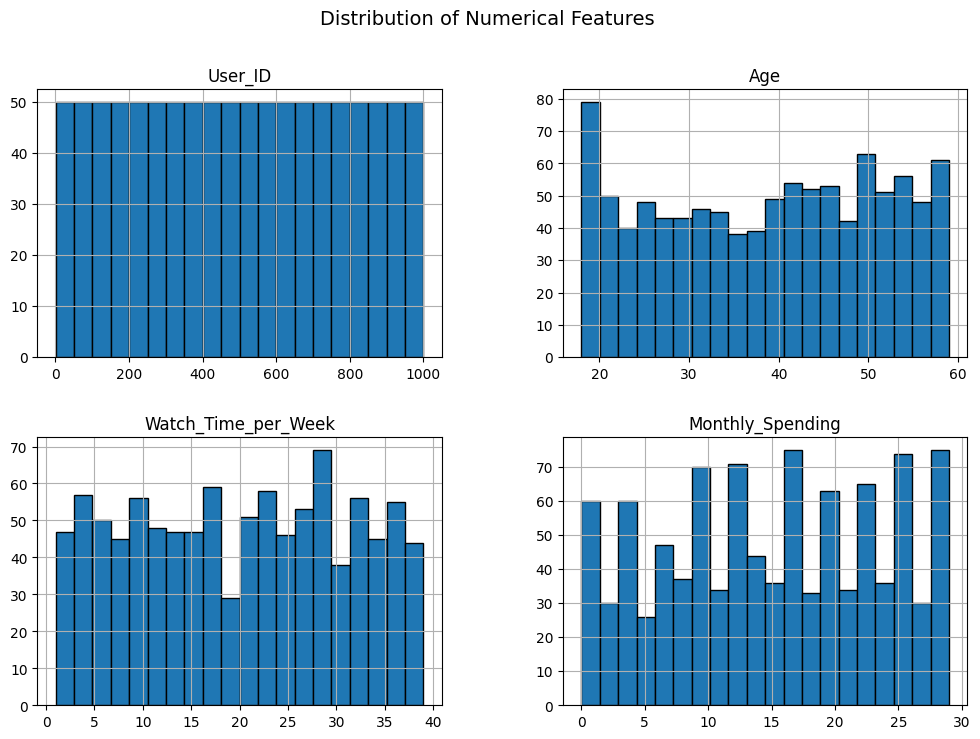

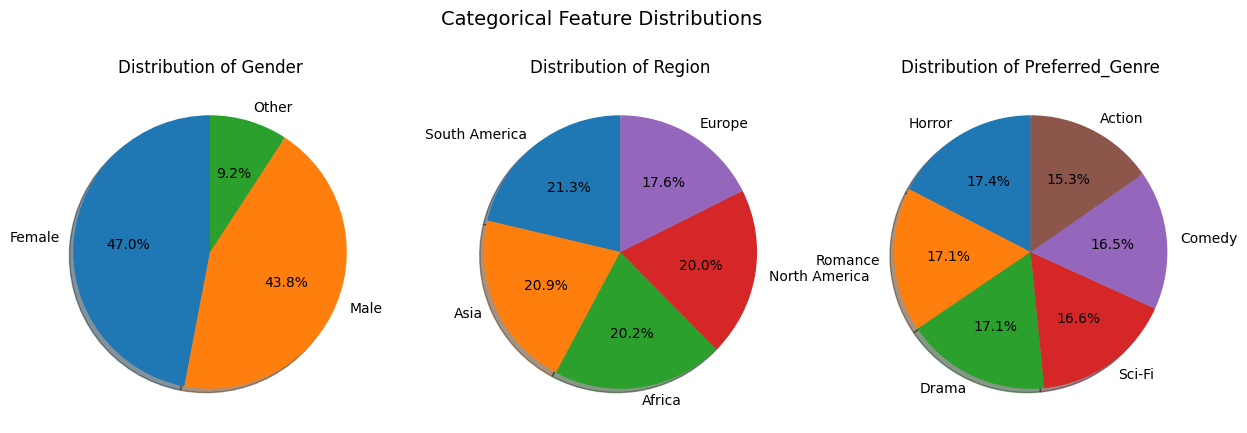

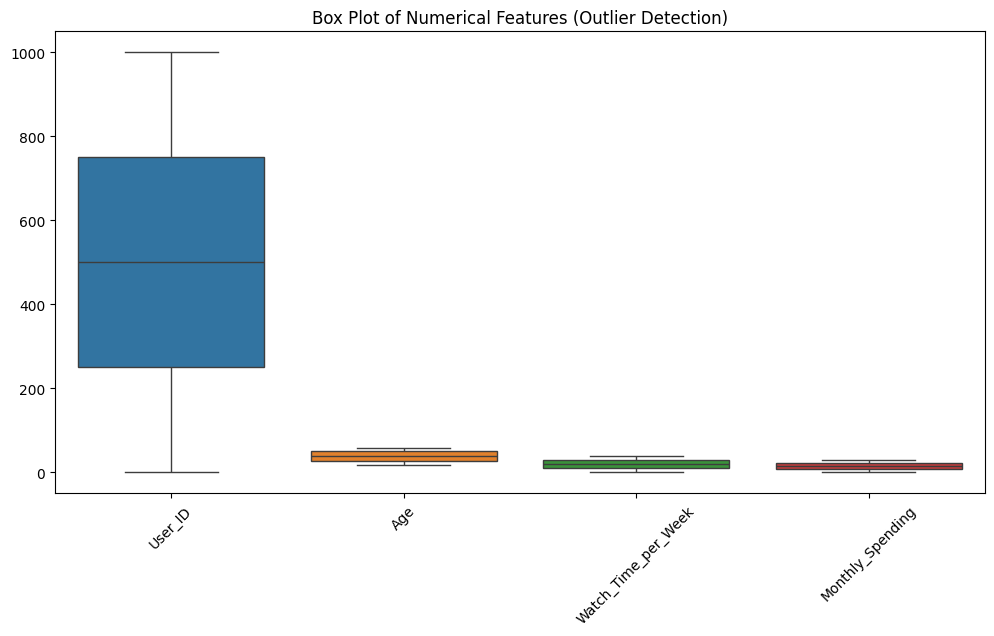

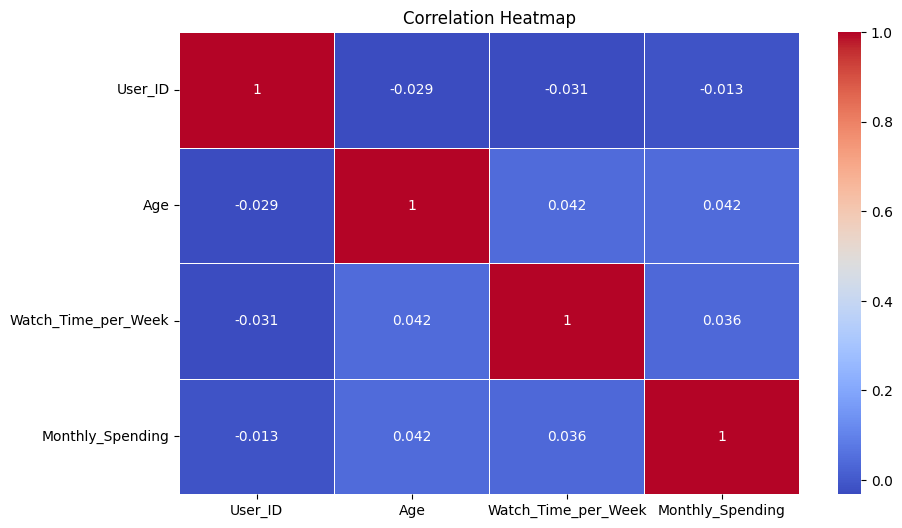

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

# Histogram for numerical features
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=14)
plt.show()

# Pie charts for categorical features (only top 3 for clarity)
cat_cols = df.select_dtypes(include=['object']).columns[:3]
fig, axes = plt.subplots(1, len(cat_cols), figsize=(15, 5))
for i, col in enumerate(cat_cols):
    df[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[i], shadow=True, startangle=90)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('')
plt.suptitle('Categorical Feature Distributions', fontsize=14)
plt.show()

# Box plots to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.title("Box Plot of Numerical Features (Outlier Detection)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()